In [1]:
import os 
print(os.getcwd())

C:\Users\Madjid


### Import Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set()
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)
import re

In [2]:
#import arabic and english tweet data 
PalArab = pd.read_excel("E:\\Work\\Data Analysis Projects\\Palestinian Project\\Twitter Scraped Data\\Palestine_Ar Data.xlsx")
PalEng = pd.read_excel("E:\\Work\\Data Analysis Projects\\Palestinian Project\\Twitter Scraped Data\\Palestine_Ar Data1.xlsx")

### View and inspect Data

In [3]:
#View Dataset columns
PalArab.columns

Index(['Tweet Id', 'DateTime', 'Place', 'Source', 'Username', 'Content',
       'hashtags', 'Likes Number', 'Quote Number', 'Reply Number',
       'Retweets Number'],
      dtype='object')

In [4]:
PalArab.head()

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number
0,1564763776913707008,2022-08-30 23:55:30,NaN,"<a href=""http://twitter.com/download/android"" ...",maher_jouda,ما يحدث في غزة من تغول على حقوق العمال هو نتيج...,NaN,22,0,2,2
1,1564763137299078912,2022-08-30 23:52:58,NaN,"<a href=""http://twitter.com/download/iphone"" r...",petgrieff,اللي صار اليوم عندنا وفي فلسطين يورينا شكثر أح...,NaN,16,0,1,4
2,1564762223435735040,2022-08-30 23:49:20,NaN,"<a href=""http://twitter.com/download/android"" ...",Hamza19819,فى قانون كربلاء ،،\nفاقد الماء قد روى كونآ كام...,NaN,75,0,5,10
3,1564756480854822912,2022-08-30 23:26:31,NaN,"<a href=""http://twitter.com/download/android"" ...",NourThranduil,صورة لمسيرة نسائية في غزة تقودها دكتورة مريم أ...,NaN,27,0,0,6
4,1564756315326628096,2022-08-30 23:25:51,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",AlnashtHmzt,تعرف شو يعني بناتك في غزة .. تيجي جمعية صهيوني...,NaN,14,0,2,0


In [5]:
PalEng.head()

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number
0,1564764335079137024,2022-08-30 23:57:44,NaN,"<a href=""http://twitter.com/download/android"" ...",CrazyNormie,Why does every Corbyn cracker rightly believe ...,NaN,19,0,8,1
1,1564762949134196992,2022-08-30 23:52:13,NaN,"<a href=""http://twitter.com/download/iphone"" r...",aidanaustria,i’m having a nice time with my friends :) http...,NaN,11,0,1,0
2,1564762561865814016,2022-08-30 23:50:41,NaN,"<a href=""http://twitter.com/download/iphone"" r...",New_Pal_Golf,"County Champs! Zoe Nelson, Katie Kelley and Ka...",['NewPalProud'],45,1,0,5
3,1564761054680388096,2022-08-30 23:44:41,NaN,"<a href=""http://twitter.com/download/iphone"" r...",HonestReporting,"No Jews, No News: The Deadly Gaza Explosion Me...",NaN,28,3,1,17
4,1564759653405318912,2022-08-30 23:39:07,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NPHSDragons,"Golf: NP wins county golf title shooting 187,...",NaN,44,0,1,6


In [6]:
PalArab.shape , PalEng.shape

((129374, 11), (71693, 11))

In [7]:
PalArab.dtypes , PalEng.dtypes

(Tweet Id                    int64
 DateTime           datetime64[ns]
 Place                      object
 Source                     object
 Username                   object
 Content                    object
 hashtags                   object
 Likes Number                int64
 Quote Number                int64
 Reply Number                int64
 Retweets Number             int64
 dtype: object,
 Tweet Id                    int64
 DateTime           datetime64[ns]
 Place                      object
 Source                     object
 Username                   object
 Content                    object
 hashtags                   object
 Likes Number                int64
 Quote Number                int64
 Reply Number                int64
 Retweets Number             int64
 dtype: object)

In [8]:
PalArab.isna().sum() , PalEng.isna().sum()

(Tweet Id                0
 DateTime                0
 Place              128312
 Source                  0
 Username                0
 Content                 0
 hashtags            57375
 Likes Number            0
 Quote Number            0
 Reply Number            0
 Retweets Number         0
 dtype: int64,
 Tweet Id               0
 DateTime               0
 Place              70510
 Source                 0
 Username               0
 Content                0
 hashtags           44075
 Likes Number           0
 Quote Number           0
 Reply Number           0
 Retweets Number        0
 dtype: int64)

In [9]:
#Calculating percentage of Missing values in PLace column
print("% of Values in a column (including missing values) : ")
PalArab["Place"].value_counts(normalize=True,dropna=False,)*100

% of Values in a column (including missing values) : 


NaN                                                                                                                                                                     99.179124
Place(fullName='Lebanon', name='Lebanon', type='country', country='Lebanon', countryCode='LB')                                                                           0.255074
Place(fullName='Amman, Hashemite Kingdom of Jordan', name='Amman', type='admin', country='Hashemite Kingdom of Jordan', countryCode='JO')                                0.046377
Place(fullName='Riyadh, Kingdom of Saudi Arabia', name='Riyadh', type='city', country='Kingdom of Saudi Arabia', countryCode='SA')                                       0.043285
Place(fullName='Illinois, USA', name='Illinois', type='admin', country='United States', countryCode='US')                                                                0.027053
                                                                                                              

In [10]:
PalEng["Place"].value_counts(normalize=True,dropna=False)*100

NaN                                                                                                                                            98.349909
Place(fullName='Johannesburg, South Africa', name='Johannesburg', type='city', country='South Africa', countryCode='ZA')                        0.167380
Place(fullName='Israel', name='Israel', type='country', country='Israel', countryCode='IL')                                                     0.157617
Place(fullName='New Delhi, India', name='New Delhi', type='city', country='India', countryCode='IN')                                            0.029292
Place(fullName='Washington, DC', name='Washington', type='city', country='United States', countryCode='US')                                     0.027897
                                                                                                                                                 ...    
Place(fullName='Friendship Heights Village, MD', name='Friendship Heights Village'

In [11]:
#Calculating percentage of Missing values in Hashtags column
print("% of Values in a column (including missing values) : ") 
PalArab["hashtags"].value_counts(normalize=True,dropna=False,)*100

% of Values in a column (including missing values) : 


NaN                                                           44.348169
['فلسطين']                                                     4.630760
['غزة']                                                        2.357506
['غزة_تحت_القصف']                                              2.264752
['غزه_تقاوم']                                                  0.684063
                                                                ...    
['أربعون_ربيعا', 'حزب_الله_ارهابي']                            0.000773
['ابن_العربي_المالكي', 'نابلس', 'فلسطين', 'بيت_المقدس']        0.000773
['الأردن', 'فلسطين', 'التلفزيون_الأردني', 'المنخفض_الجوي']     0.000773
['غزه', 'ال_سعود']                                             0.000773
['غزة_تحت_القصف', 'غزة_تصرخ', 'فريق_مجاهدون']                  0.000773
Name: hashtags, Length: 30692, dtype: float64

In [12]:
print("% of Values in a column (including missing values) : ") 
PalEng["hashtags"].value_counts(normalize=True,dropna=False,)*100

% of Values in a column (including missing values) : 


NaN                                              61.477411
['Palestine']                                     3.010057
['Gaza']                                          2.531628
['FreePalestine']                                 1.673804
['GazaUnderAttack']                               1.244194
                                                   ...    
['Palestine', 'yemem', 'Ukraine', 'refugees']     0.001395
['ColonialHypocrisyKills', 'Nakba74']             0.001395
['UNRWA', 'PalestineRefugees', 'Gaza']            0.001395
['DumpTheIncumbents']                             0.001395
['ForPalestineRefugees']                          0.001395
Name: hashtags, Length: 12319, dtype: float64

### Cleaning the Data

In [13]:
#Checking for Duplicates 
PalArab[PalArab["Tweet Id"].duplicated()==True]

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number


In [14]:
#Checking for Duplicates 
PalEng[PalEng["Tweet Id"].duplicated()==True]

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number


In [15]:
PalArab[PalArab["Content"].duplicated()==True]

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number
76,1564706259932271104,2022-08-30 20:06:57,NaN,"<a href=""https://about.twitter.com/products/tw...",qudsn,عاجل| مصادر عبرية: إصابة مستوطنين اثنين على ال...,NaN,19,0,1,3
78,1564705958118522880,2022-08-30 20:05:45,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Alaqsavoice_Brk,⭕ عاجل| مصادر عبرية: إصابة مستوطنين اثنين على ...,NaN,48,0,1,4
79,1564705760495522048,2022-08-30 20:04:58,NaN,"<a href=""http://twitter.com/download/android"" ...",PalinfoAr,"عاجل| مصادر عبرية: ""إصابة مستوطنين اثنين على ا...",NaN,17,0,2,5
585,1564374786079343104,2022-08-29 22:09:48,NaN,"<a href=""http://twitter.com/download/android"" ...",zicdl1,جامع النجباااء في شارع فلسطين\n\nسلملي,NaN,14,0,0,2
670,1564329357488922880,2022-08-29 19:09:17,NaN,"<a href=""https://about.twitter.com/products/tw...",Qudsn_Brk,"عاجل| مصادر صحفية: ""إطلاق نار كثيف باتجاه طائر...",NaN,25,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
129090,1477272647528594944,2022-01-01 13:37:00,NaN,"<a href=""https://about.twitter.com/products/tw...",fahadlghofaili,"""قضية فلسطين لن تموت لأنها عقيدة في قلب كل مسل...",NaN,140,1,2,24
129283,1477172351758393088,2022-01-01 06:58:27,NaN,"<a href=""https://about.twitter.com/products/tw...",Qudsn_Brk,"عاجل| مصدر بالمـــقاومة لـ""#فلسطين الآن"": ""الص...","['فلسطين', 'غزة']",29,0,1,2
129332,1477158667774565888,2022-01-01 06:04:05,NaN,"<a href=""http://octipulse.com/"" rel=""nofollow""...",AlMayadeenNews,فلسطين المحتلة: مدير مكتب الميادين: جيش الاحتل...,NaN,90,0,0,10
129351,1477150896207375872,2022-01-01 05:33:12,NaN,"<a href=""https://about.twitter.com/products/tw...",Qudsn_Brk,"عاجل| القناة 12 العبرية: ""الجيش يفحص تقارير تت...",NaN,30,1,0,3


So there is Duplicates to Drop since they have the same content while we filtered replies

In [16]:
PalEng[PalEng["Content"].duplicated()==True]

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number
513,1564358255417200896,2022-08-29 21:04:07,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Consortiumnews,Media Bias Enables Israel’s War on Palestine h...,NaN,40,2,2,29
1156,1563886663545377024,2022-08-28 13:50:10,NaN,"<a href=""http://twitter.com/download/android"" ...",Ahmedwsh95,How many people are going to share this?\n\nFR...,NaN,88,1,0,79
3555,1560597303542829056,2022-08-19 11:59:26,NaN,"<a href=""http://twitter.com/download/android"" ...",SulalaSociety,Dear Tweeps A word of warning. \nIf you suppor...,NaN,67,4,27,66
4240,1559633849725997056,2022-08-16 20:11:01,NaN,"<a href=""http://twitter.com/download/iphone"" r...",MarieMarie21990,Having been besieged for 15 years with a tragi...,NaN,21,1,2,19
4270,1559606415458767104,2022-08-16 18:22:00,NaN,"<a href=""http://twitter.com/download/iphone"" r...",MuhammadSmiry,Having been besieged for 15 years with a tragi...,NaN,590,5,24,256
...,...,...,...,...,...,...,...,...,...,...,...
70809,1477993574574833920,2022-01-03 13:21:42,NaN,"<a href=""http://twitter.com/download/android"" ...",Somroo_Abdul,"O Allah,\nprotect Palestine \n#StandWithGaza",['StandWithGaza'],18,1,0,17
71277,1477421882957869056,2022-01-01 23:30:00,NaN,"<a href=""https://sproutsocial.com"" rel=""nofoll...",thenation,"""Our eyes, it seems, turn to the besieged Gaza...",NaN,660,9,11,338
71325,1477414098182675968,2022-01-01 22:59:04,NaN,"<a href=""https://about.twitter.com/products/tw...",spectatorindex,BREAKING: Israel's military has fired missiles...,NaN,2756,172,120,693
71455,1477400991574245120,2022-01-01 22:06:59,NaN,"<a href=""http://twitter.com/download/iphone"" r...",MuhammadSmiry,Israeli warplanes are bombing Gaza at the moment.,NaN,5356,151,120,3248


In [17]:
PalArab.drop_duplicates(["Content"],inplace=True,keep='first')
PalEng.drop_duplicates(["Content"],inplace=True,keep='first')

In [18]:
#Checking if duplicates are gone  : 
PalArab[PalArab["Content"].duplicated()==True]

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number


In [19]:
PalEng[PalEng["Content"].duplicated()==True]

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number


In [20]:
#transforming the source column  : 
pd.set_option('display.max_colwidth', None)
PalArab["Source"].unique

<bound method Series.unique of 0         <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
1           <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2         <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
3         <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
4                      <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>
                                                  ...                                         
129369      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
129370    <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
129371      <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
129372    <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
129373     <a href=

In [21]:
#Extracting a substring in a string value then replacing it with its last word 
marker1 = '>'
marker2 = '</a>'
PalArab["Source"] = PalArab["Source"].str.extract(marker1+'(.+?)'+marker2)
PalEng["Source"] = PalEng["Source"].str.extract(marker1+'(.+?)'+marker2)

In [22]:
PalArab["Source"] = PalArab["Source"].str.replace("Twitter for Android","Android")
PalArab["Source"] = PalArab["Source"].str.replace("Twitter for iPhone","iPhone")
PalEng["Source"] = PalEng["Source"].str.replace("Twitter for Android","Android")
PalEng["Source"] = PalEng["Source"].str.replace("Twitter for iPhone","iPhone")

In [23]:
#extracting month,day and hour
PalArab["Month"] = pd.to_datetime(PalArab["DateTime"]).dt.month 
PalArab["Day"] = pd.to_datetime(PalArab["DateTime"]).dt.day 
PalArab["Hour"] = pd.to_datetime(PalArab["DateTime"]).dt.hour 
PalEng["Month"] = pd.to_datetime(PalEng["DateTime"]).dt.month 
PalEng["Day"] = pd.to_datetime(PalEng["DateTime"]).dt.day 
PalEng["Hour"] = pd.to_datetime(PalEng["DateTime"]).dt.hour 

In [24]:
#convert "DateTime" column into date only column
PalArab["DateTime"] = pd.to_datetime(PalArab["DateTime"]).dt.date
PalEng["DateTime"] = pd.to_datetime(PalEng["DateTime"]).dt.date

In [25]:
PalEng.head()

,Tweet Id,DateTime,Place,Source,Username,Content,hashtags,Likes Number,Quote Number,Reply Number,Retweets Number,Month,Day,Hour
0,1564764335079137024,2022-08-30,NaN,Android,CrazyNormie,Why does every Corbyn cracker rightly believe that Palestine should have independence while oh so wrongly believing Ukraine should be a province of Moscow?,NaN,19,0,8,1,8,30,23
1,1564762949134196992,2022-08-30,NaN,iPhone,aidanaustria,i’m having a nice time with my friends :) https://t.co/ZSCwKB7xJG,NaN,11,0,1,0,8,30,23
2,1564762561865814016,2022-08-30,NaN,iPhone,New_Pal_Golf,"County Champs! Zoe Nelson, Katie Kelley and Kate Stanfield earned all-county honors! Great team effort!! #NewPalProud @NPHSDragons @VoelzJames https://t.co/Im9La1i2QK",['NewPalProud'],45,1,0,5,8,30,23
3,1564761054680388096,2022-08-30,NaN,iPhone,HonestReporting,"No Jews, No News: The Deadly Gaza Explosion Media Didn’t Report On.\nhttps://t.co/ODldRM3OLQ\nReported by our @koningsveld",NaN,28,3,1,17,8,30,23
4,1564759653405318912,2022-08-30,NaN,iPhone,NPHSDragons,"Golf: NP wins county golf title shooting 187, MV 207, GC 223. https://t.co/UdMpJa6v0g",NaN,44,0,1,6,8,30,23


In [26]:
#clean strings 
PalArab["Content"] = PalArab["Content"].str.replace("\n",' ')
PalArab["Content"] = PalArab["Content"].str.replace("[a-zA-Z]",' ')
PalEng["Content"] = PalEng["Content"].str.replace("\n",' ')

In [27]:
#removing links from the tweet 
def clean(col) : 
    col =  re.sub("http\S*\s", "", col)
    return col
PalArab["Content"] = PalArab["Content"].apply(str)
PalArab["Content"] = PalArab["Content"].apply(clean)

In [28]:
PalEng["Content"] = PalEng["Content"].apply(str)
PalEng["Content"] = PalEng["Content"].apply(clean)

In [29]:
#Merge the two datasets 
PalArab["LANG"] = "Arabic" 
PalEng["LANG"] = "English"

In [30]:
Palestine = pd.concat([PalArab,PalEng])

In [31]:
#Sorting  : 
Palestine.sort_values(by=["Month","Day","Hour"],inplace=True,ascending =True)

In [32]:
Palestine["hashtags"].value_counts()

['فلسطين']                                                               5939
['غزة']                                                                  3016
['غزة_تحت_القصف']                                                        2918
['Palestine']                                                            2162
['Gaza']                                                                 1811
                                                                         ... 
['عفرين', 'كوردستان', 'فلسطين']                                             1
['مسلسل_الكر_والفر', 'إسرائيل', 'فلسطين_ليست_قضيتي', 'المسجد_الأقصى']       1
['فلسطين', 'الكويت_ضد_التطبيع']                                             1
['Ramadan', 'Palestine', 'Resistance']                                      1
['ForPalestineRefugees']                                                    1
Name: hashtags, Length: 42810, dtype: int64

In [33]:
#filling hashtags Nan Values
Palestine["hashtags"].fillna('No_Hash',inplace=True)

In [34]:
#cleaning hashtags
def clean2(col) : 
    col = re.sub("[']","",col)
    return col 
Palestine["hashtags"] = Palestine["hashtags"].apply(str)
Palestine["hashtags"] = Palestine["hashtags"].apply(clean2)
Palestine["hashtags"] = Palestine["hashtags"].str.replace(r'[][]+',"",regex=True)

## Defining the Problem: 
- we want to detect events based on tweets  
- Media Reaction to Palestinian Case overall  
- Media Reaction to specific events  
- Arabic and English Media Comparison  

## Analysis Steps : 

- Basic analysis : most used device , user with the most number of tweets or likes  
1) Detecting events :   
   - sort datasets  
   - plot tweets count and find the days/month with the highest number of tweets  
   - repeating hashtags in that time    
2) Media Reaction to Palesinian Case overall & specific events:   
   - Sentiment analysis for both arabic and english   
   - add it to a column   
   - aggregate total reaction for all data and for the specific events  

3) Arabic and english comparison :   
   - compare number of tweets   
   - number of (likes,retweets,comments) for the top contributers  
   - sentiment comparison  


### Basic Analysis : 

Text(0.5, 1.0, 'Most used devices for tweeting for English speakers')

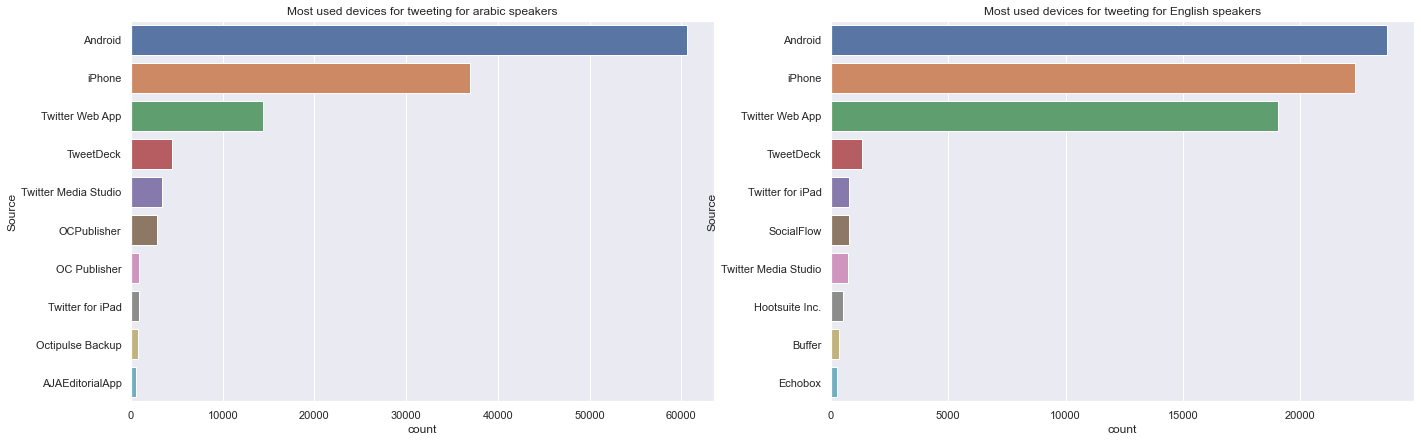

In [36]:
#Most used devices for both arabic and enlgish users : 

plt.figure(figsize = (23, 7))
plt.subplot(1,2,1)
plt.title("Most used devices for tweeting for arabic speakers")
sns.countplot(y=PalArab["Source"],order=pd.value_counts(PalArab["Source"]).iloc[:10].index)
plt.subplot(1,2,2)
sns.countplot(y=PalEng["Source"],order=pd.value_counts(PalEng["Source"]).iloc[:10].index)
plt.title("Most used devices for tweeting for English speakers")

Text(0.5, 1.0, 'Most used devices for tweeting for English speakers')

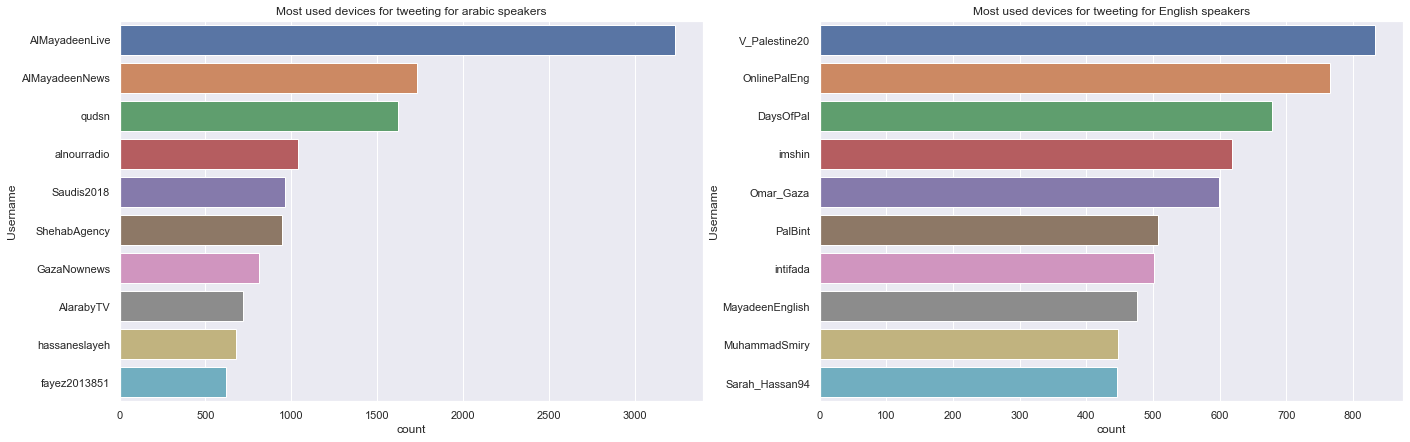

In [37]:
#Most tweeting user   : 
plt.figure(figsize = (23, 7))
plt.subplot(1,2,1)
plt.title("Most used devices for tweeting for arabic speakers")
sns.countplot(y=PalArab["Username"],order=pd.value_counts(PalArab["Username"]).iloc[:10].index)
plt.subplot(1,2,2)
sns.countplot(y=PalEng["Username"],order=pd.value_counts(PalEng["Username"]).iloc[:10].index)
plt.title("Most used devices for tweeting for English speakers")

### Detecting events : 

In [38]:
import plotly.express as px
count = Palestine["Month"].value_counts()
count1 =count.to_frame()
count1 = count1.sort_index()

In [66]:
count1

,Month
1,17885
2,15378
3,19769
4,33977
5,28369
6,14036
7,13289
8,56343


In [67]:
fig = px.line(count1, x=count1.index, y='Month', title='Months with the highest tweets number',labels={
    'Month' : 'Number of Tweets',
    'index' : '2022 Months'
})
fig.show()

In [75]:
#top 20 days with the highest tweets number
countt = pd.value_counts(Palestine["DateTime"]).iloc[:20] 
countt =countt.to_frame()
countt = countt.sort_index()
fig = px.line(countt, x=countt.index, y='DateTime', title='Dates With the highest tweets ',labels={
    'DateTime' : 'Number of Tweets',
    'index' : '2022 Dates'
})
fig.show()

*Trending Hashtags in 14,15 april 10,11 may and 4,5,6 augest*

In [41]:
#making a list and converting the column into a datetime
#obviously it was a datetime before but when we merged datasets it became an object column 
Datelst = ["2022-04-14","2022-04-15","2022-05-10","2022-05-11","2022-08-04","2022-08-05","2022-08-06"]
Palestine["DateTime"] = pd.to_datetime(Palestine["DateTime"])

In [42]:
#converting the list into datetime and filtering the data based on the list 
dates = pd.to_datetime(Datelst)
df = Palestine[Palestine.DateTime.isin(dates)]

In [43]:
df["hashtags"].unique()

array(['No_Hash', 'فلسطين_قضيتي', 'الكيان_المؤقت, فلسطين, التطبيع_خيانة',
       ..., 'China, Gaza', 'Gaza, Ukraine, IsraeliTerrorism, Palestinian',
       'Gaza, GazaUnderAttack, نتيجة_التطبيع, غزة_تحت_القصف_الآن'],
      dtype=object)

In [44]:
#Removing rows with no hashtags
df = df[df['hashtags']!='No_Hash']

In [45]:
df = df.reset_index()

In [46]:
#Splitting and storing hashtags into a list : 
hashlstt = []
for i in range(len(df)) : 
    s = df['hashtags'][i].split(',')
    hashlstt.append(s)


[['فلسطين_قضيتي'], ['الكيان_المؤقت', ' فلسطين', ' التطبيع_خيانة'], ['فلسطين_قضيتي', ' كلنا_جنين', ' من_اليمن_هنا_فلسطين'], ['غزة', ' فلسطين'], ['جنين'], ['فلسطين'], ['فلسطين'], ['فلسطين_تزُف_شبابها', ' نزف_الدم'], ['فلسطين', ' الحرية_لأحمد_مناصرة'], ['نشر_سيرة_خير_البشر', ' الحرية_لاحمد_مناصرة', ' فلسطين'], ['فلسطين_تنتفض'], ['الان'], ['فلسطين', ' الكيان_المؤقت', ' فلسطين_قضيتي'], ['فلسطين', ' المسجد_الأقصى', ' جنين'], ['فلسطين', ' غرب_آسيا'], ['الأقصى_في_خطر', ' القدس_خط_أحمر', ' فلسطين_قضيتي'], ['فلسطين', ' فلسطين_تقاوم', ' طوفان_فلسطين'], ['فلسطين_قضيتي', ' فلسطين_قضية_الشرفاء', ' IsraeliApartheid'], ['Palestine', ' FreeAhmadManasra', ' SaveSheikhJarrah', ' Ukraine', ' الحرية_لأحمد_مناصرة', ' القدس', ' فلسطين'], ['Gaza'], ['شاهد', ' جنين'], ['فتوى', ' فلسطين', ' التنسيق_الأمـنـي', ' العكلوك'], ['الكيان_المؤقت'], ['عاشت_فلسطين', ' عين_المقاومة'], ['أحمد_مناصرة', ' فلسطين'], ['فلسطين'], ['فلسطين_قضيتي', ' فلسطين_قضية_الشرفاء', ' طوفان_فلسطين'], ['FreePalestine', ' SahabatPalestina_ID'

In [47]:
#unlist the lists of list 
def flatten(l):
    return [item for sublist in l for item in sublist]
hashlstt = flatten(hashlstt)

In [48]:
#remove white spaces
hashlstt =  map(str.strip, hashlstt)

In [49]:
from collections import Counter 
hashcount = Counter(hashlstt) #counting number of hashtags (returns a dictionnary)

In [76]:
srt_dct = dict(sorted(hashcount.items(), key=lambda item: item[1], reverse=True))
keylist = list()

for key in srt_dct.keys():
    keylist.append(str(key))

fig = px.bar(x = keylist[:15], y = list(srt_dct.values())[:15],color=list(srt_dct.values())[:15],title='Trending Hashtags in the Days with the highest Tweets',labels={
    'y' : 'Number of Hashtags',
    'x' : 'Trending Hashtags'
})
fig.show()

###  Media Reaction to Palesinian Case overall & specific events:   

### Sentiment analysis

export files and do SA in a different notebook 

In [80]:
Palestine.to_excel('E:\\Work\\Data Analysis Projects\\Palestinian Project\\Sentiment analysis files\\SentimentFile.xlsx')

In [51]:
ArabSenti = pd.read_excel('E:\Work\Data Analysis Projects\Palestinian Project\VersAR.xlsx',index_col=0) 
EngSenti = pd.read_excel('E:\Work\Data Analysis Projects\Palestinian Project\VersEn.xlsx',index_col=0)

In [52]:
ArabSenti.head(7)

,Content,Tweet Id,Sentiment
0,تكفّلت الأطفال الأيتام من مجزرة دير ياسين، و قامت بإيوائهم و تعليمهم في منزلها، الذي أصبح لاحقًا دار الطفل العربي، و يضم مستوصفًا و مدرسة من الروضة إلى التعليم الثانوي و متحف للتراث الفلسطيني و كلية البنات. المقدسية صانعة الأجيال المرحومة 🌹 #هند_الحسيني 🇵🇸 #فلسطين_قضيتي ✌️ :// . /0 1,1535198740876869888,Positive
1,اللهم كن لإخواننا في فلسطين وغزه عونا اللهم الطف بهم وانتقم من اليهود ومن عاونهم,1556881938350318080,Positive
2,فيديو يوثق لحظة هروب جنود الاحتلال من حجارة الشبان خلال مواجهات مخيم الدهيشة جنوب بيت لحم #فلسطين # #القدس #غزة #إلا_رسول_الله_يامودى # _ :// . / 2,1534050895209680896,Positive
3,بن غفير عضو الكنيست والمتشدد وفي ظل الاعتدائات الهمجية غزة قالت كلمتها ولا مجال للمزاح او السكوت عن هذا الجرم .. قوة الردع :// . /,1493543385822646016,Neutral
4,#نفير_الأقصى سيعود الحق إلى أهله ما دام وراء الحق مقاتل هي راية حق في وجه اعلام باطل لن يمروا وفي فلسطين اشاوس :// . / 0 8,1530616162555420928,Positive
5,تعزّ علينا فلسطين تعز علينا أحزانها فسلامُ الله عليها حتى تطمئن...💙 :// . / 7,1515635054197850112,Positive
6,فلسطين الفرح ..,1512142051118362880,Positive


In [53]:
EngSenti.head(7)

,Content,Tweet Id,Sentiment
0,a photo from 2021 that will always ground me and will never leave me is this one. i am eternally humbled by the unyielding resistance of my people and their unwavering commitment for liberation despite all odds. to a liberated Palestine in our lifetimes 🇵🇸♥️,1477076437651934976,Positive
1,"My 2022 wish: for world to embrace the incredible contribution of principled women activists in conflict areas &amp; promote their leadership to forge global peace -in Afghanistan, CAR, DRC, Haiti, Iraq, Lebanon, Libya, Mali, Myanmar, Palestine, Sudan, Syria, Yemen+ @ninalahoud4paix",1477073720875311104,Positive
2,"I for one have never bought into the international ZOG ... but, like no other, Jews worldwide have a moral and historical imperative to confront and to cripple crimes against humanity carried out in their name every moment of every day in Palestine.",1477070281596408064,Negative
3,"I forgot to say that partner and kid made me a mug with images of the many actions we helped organize and/or attended throughout the year. I was at many vigils in my hood, multiple massive actions to stand with and call for a Free Palestine, and countless confrontations w #LASD.",1477069177764545024,Neutral
4,Happy New Year friends. All we want for 2022 is a free Palestine! ✊🏾🇵🇸,1477067807644922112,Positive
5,2022 resolution: Free Palestine.,1477096973903802112,Neutral
6,covid: positive sex: negative israel/palestine: neutral,1477093958517992960,Neutral


In [54]:
Sentidf = pd.concat([ArabSenti,EngSenti])

In [55]:
SentiPal = pd.merge(Palestine,Sentidf,on=['Tweet Id'])

In [56]:
Palestine.shape

(199046, 15)

In [71]:
fig = px.pie(SentiPal,values=SentiPal['Sentiment'].value_counts(),names=SentiPal['Sentiment'].unique(),title='Total Sentiments of the Palestinian Case')
fig.show()

In [58]:
Eventspal = pd.merge(df,Sentidf,on=['Tweet Id'])

In [72]:
fig = px.pie(Eventspal,values=Eventspal['Sentiment'].value_counts(),names=Eventspal['Sentiment'].unique(),title='Total Sentiments in the Events')
fig.show()

### individuals that contributed the most in occured events & overall :   


In [60]:
#Most likes :
pd.option_context('display.max_rows',20)
pivotb = pd.pivot_table(data = Palestine,values = ["Likes Number"],index=['Content','Username'],aggfunc='sum')
pivotb.sort_values(by='Likes Number',ascending=False,inplace=True)
pivotb.head(10)

,,Likes Number
Content,Username,
If this was a Palestine flag they would’ve deducted points https://t.co/08J7R4M1z2,JamzLnd,134646
Palestine were forced to forfeit a match last week and no one cared https://t.co/l7j4tL3kCY,ZakMartin02,118039
"Gaza, Palestine. A country with such people will never be defeated. https://t.co/jtlfJxPL4C",FrancieMolloy,109719
"Wishing Muslims everywhere Eid Mubarak. As we celebrate &amp; thank Allah for his blessings this Eid that commemorates sacrifice, let us remember &amp; pray for those who are without their loved ones &amp; for the people of IIOJK &amp; Palestine suffering oppression under brutal Occupation.",ImranKhanPTI,78907
Not a single media outlet talking about this.. so typical. Free Palestine. https://t.co/DxvjHU44PP,Messilizer,71621
Bella Hadid has 51m followers on Instagram and works with the biggest brands out there. yet she is shedding light on what’s happening in Palestine.. While ‘‘ influencers ’’ who barely anyone knows are silent because they are afraid of losing their accounts and brand deals.🤦🏻‍♀️ https://t.co/ZOLtaNFsRg,supportpalesti9,69462
"Let's keep praying for peace in the world 🌎🕊️ - not just in Ukraine 🇺🇦, but also in Palestine🇵🇸, Syria🇸🇾, Yemen🇾🇪, Iraq🇮🇶 and all other places in the world where people are suffering from war 🤲🏼☪️ #StopWAR #JummaMubarak #M1Ö https://t.co/U4COhEjqXk",M10,66175
"Israeli forces again launched air strikes against besieged Palestinians, incl children,in Gaza, violating all int laws. Israel is trying to use its massive mly power to subjugate the Palestinian ppl &amp; eliminate those who stand up for their rights &amp; for end to Israeli occupation",ImranKhanPTI,62415
What happened in Palestine vs how the NYT reports it https://t.co/MciclsTpJh,ZohranKMamdani,60083


In [61]:
#Most likes :
pd.option_context('display.max_rows',20)
pivotb2 = pd.pivot_table(data = df,values = ["Likes Number"],index=['Content','Username'],aggfunc='sum')
pivotb2.sort_values(by='Likes Number',ascending=False,inplace=True)
pivotb2.head(10)

,,Likes Number
Content,Username,
Go back to sleep. This is #Gaza not #Ukraine https://t.co/SpIOuA8tFb,SamarDJarrah,43616
The Israel-Gaza conflict in one picture. #Israel #Gaza https://t.co/nlaomW1heS,HananyaNaftali,26573
You need to show this to the world #Gaza https://t.co/mTEEJfChQz,MuhammadSmiry,18241
عاجل | استشهاد الزميلة #شيرين_أبو_عاقلة برصاص الجيش الإسرائيلي أثناء تغطيتها لاقتحام مخيم جنين #فلسطين :// . /,ajmubasher,17193
ارجموهم وعين الله ترعاكم فقبل الوساطة أنتم أعلم منا بقوله ﴿فَمَنِ اعْتَدَى عَلَيْكُمْ فَاعْتَدُواْ عَلَيْهِ بِمِثْلِ مَا اعْتَدَى عَلَيْكُمْ﴾ #غزة_تحت_القصف,AbdullahElshrif,16120
This footage breaks the heart! #Gaza https://t.co/HGFWBPjphS,MuhammadSmiry,10635
إنّا لنُدين العدوان الغاشم الذي شنّه الكيان الصهيوني على المواطنين رجالًا ونساءً في أرض #فلسطين المحتلة وفي قطاع #غزة، وإنّا إذ نُدين هذا الإجرام السافر لندعو الأمة الإسلامية جميعًا أن تقف بكل قوة في وجه الكيان الصهيوني المعتدي، وأن تساند بالحال والمال إخواننا في الأرض المحتلة. :// . / 3 7 9,AhmedHAlKhalili,9846
"When Gaza is under attack from isr*el, nobody cares. Of course, Gaza is not Ukraine! #GazaUnderAttack https://t.co/JQ3pkclu54",Sarah_Hassan94,9825
"Alaa Qaddom, 5 years old, was murdered today in the lsraeli attack on #Gaza. https://t.co/GbFzlGXwmu",MuhammadSmiry,9683


### Arabic and english comparison :   

In [73]:
#plot Overall Sentiment for both english and arabic  
fig = px.pie(ArabSenti,values=ArabSenti['Sentiment'].value_counts(),names=ArabSenti['Sentiment'].unique(),title='Arabic Audience Sentiments')
fig.show()
fig1 = px.pie(EngSenti,values=EngSenti['Sentiment'].value_counts(),names=EngSenti['Sentiment'].unique(),title='English Audience Sentiments')
fig1.show()

In [63]:
print(f'number of tweets of the arabic audience : {PalArab.shape[0]} \n'
     f'number of tweets of the english audience : {PalEng.shape[0]}')

number of tweets of the arabic audience : 127615 
number of tweets of the english audience : 71431


In [64]:
#Most likes :
one = np.mean(PalArab['Likes Number'])
two = np.mean(PalEng['Likes Number'])
print(f'average likes in the arabic data : {one}\n',
     f'average likes in the english data : {two}')

average likes in the arabic data : 145.778740743643
 average likes in the english data : 253.80574260475143


# INSIGHTS : 

- Android  
- IPhone  
- Twitter Web App  
- TweetDeck  
are the Most used devices to tweet

#### users that tweets the most about Palestine
- Arabic Audience : AlmayadeenLive - AlmayadeenNews - Quds
- English Audience : V Palestine - OnlinePalEng - DaysofPal

## Events Detection : 

#### Months with the Highest Tweets Number are  : 
April - May and August
#### Dates with the Highest Tweets Number are  : 
15 April - 11 May - 5 August - 6 August
#### Trending Hashtags at that Time : 
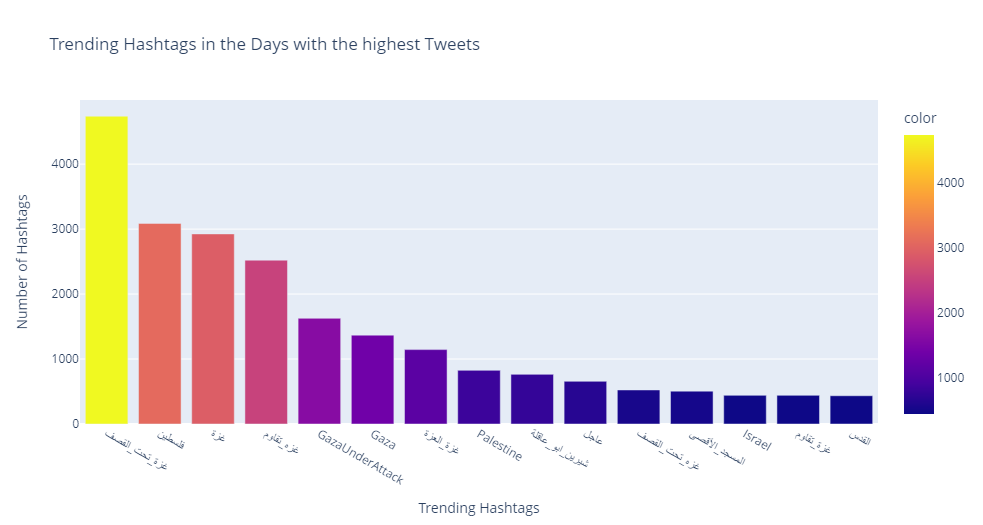

## Media Reaction : 

#### Tweets Related to Palestine are more Negative (43 % )then they are Positive (30%)  

#### Tweets Related to Events happened in 2022  are mostly Positive

## Arabic and English Audience  Comparison  : 

Arabic Sentiments are Mostly Positive (78%) 
While English Sentiments are evenly Positive and Negative 


arabic data about the Palestinian Case is larger then the english 

English Palestinian Content recieves per average more Likes then Arabic Content 